First 5 rows:


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBa

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000



Missing values:
 TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


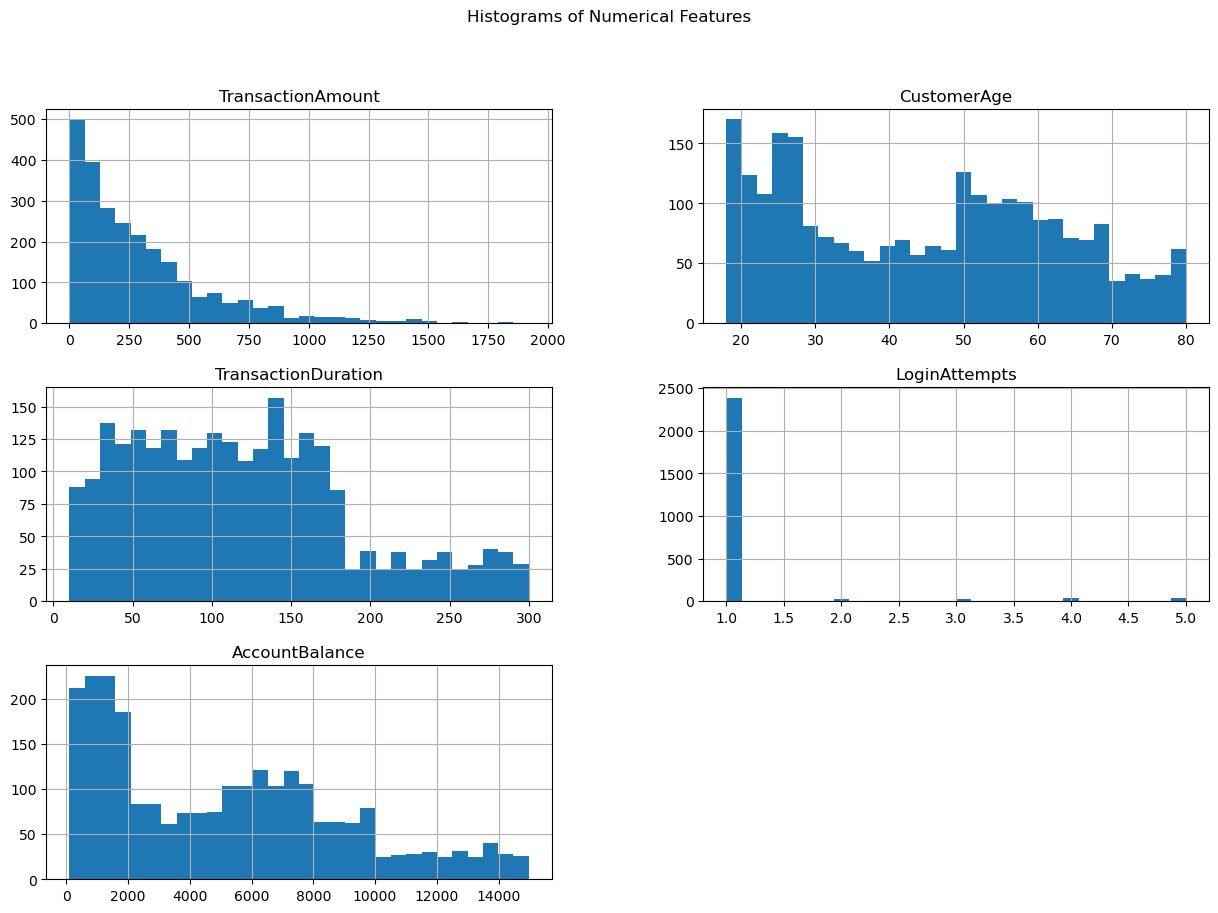

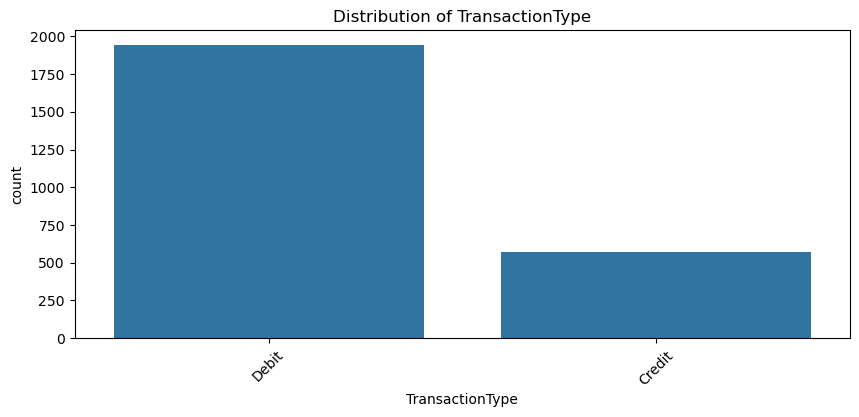

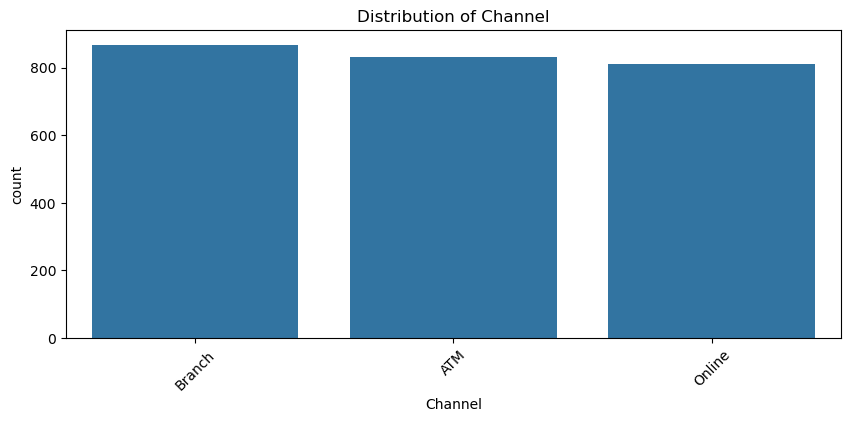

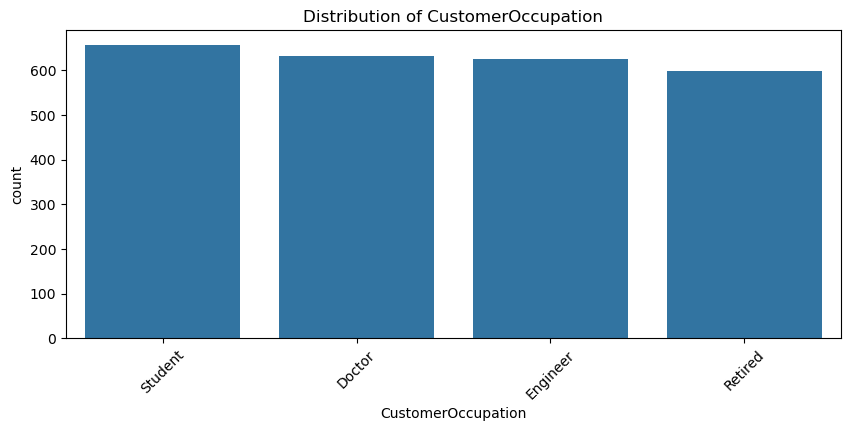

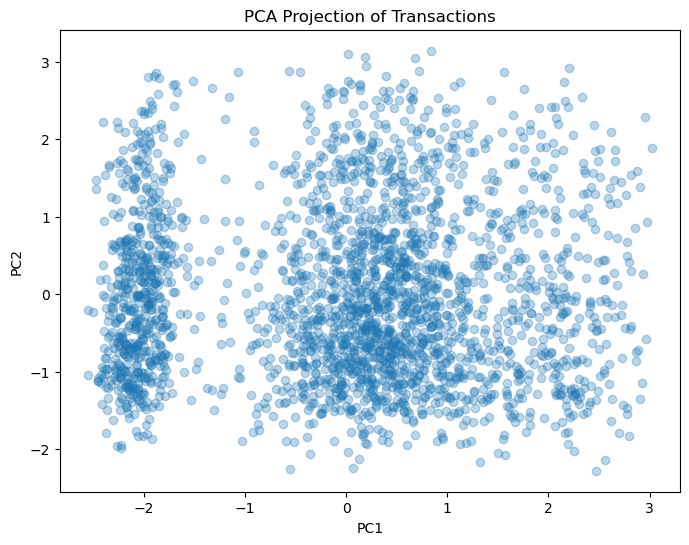

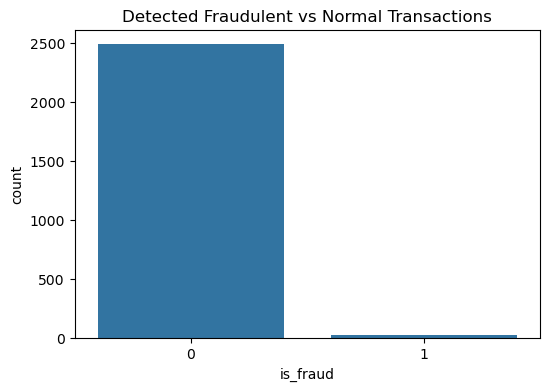

✅ EDA and anomaly detection complete. Processed data saved.


In [1]:
# exploratory_analysis.ipynb

# 📦 Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA

# 📁 Load the dataset
df = pd.read_csv("/home/firoj/Fraud_Detection_ML/data/raw/transactions_raw.csv")

# 👀 Preview the data
print("First 5 rows:")
display(df.head())

print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics:")
display(df.describe())

# 🔍 Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# 🧹 Basic cleaning - drop duplicates
df.drop_duplicates(inplace=True)

# 👁️‍🗨️ Distribution of numeric features
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols].hist(figsize=(15, 10), bins=30)
plt.suptitle("Histograms of Numerical Features")
plt.show()

# 🧼 Encode categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    if df[col].nunique() <= 20:
        plt.figure(figsize=(10, 4))
        sns.countplot(data=df, x=col, order=df[col].value_counts().index)
        plt.xticks(rotation=45)
        plt.title(f"Distribution of {col}")
        plt.show()

# 🧠 Encode and scale the data
df_encoded = df.copy()

# Label Encoding for object columns
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

# 📏 Normalize numeric values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

# 🔍 Apply PCA for 2D visualization (optional)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.3)
plt.title("PCA Projection of Transactions")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# 🌲 Anomaly detection using Isolation Forest
isf = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
df['anomaly_score'] = isf.fit_predict(X_scaled)

# Convert -1 (anomaly) to 1 for fraud, 1 to 0
df['is_fraud'] = (df['anomaly_score'] == -1).astype(int)

# 📊 Show fraud count
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=df)
plt.title("Detected Fraudulent vs Normal Transactions")
plt.show()

# 💾 Save processed dataset for model training
df.to_csv("/home/firoj/Fraud_Detection_ML/data/processed/transactions_processed.csv", index=False)

print("✅ EDA and anomaly detection complete. Processed data saved.")
